**Homeworks – Statistical learning, 2021/22. semester I.**

*Week 5*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

# Exercise a)

## Problem

![img/ex_a.png](img/ex_a.png)

## Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.datasets as smd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#from dtreeviz.trees import dtreeviz

In [2]:
data = smd.get_rdataset('Carseats', 'ISLR').data

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
target_var = 'Sales'
y = data[target_var]
X = data.drop(target_var, axis=1)

In [5]:
cols_to_encode = ['ShelveLoc', 'Urban', 'US']
X = pd.concat([X.drop(cols_to_encode, axis=1),
               pd.concat(([pd.get_dummies(X[col], prefix=col) for col in cols_to_encode]), axis=1)], axis=1)

In [6]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# Exercise b)

## Problem

![img/ex_b.png](img/ex_b.png)

## Solution

In [8]:
regr_tree = DecisionTreeRegressor(max_depth = 2)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [9]:
print(export_text(regr_tree, feature_names=list(X.columns)))

|--- ShelveLoc_Good <= 0.50
|   |--- Price <= 106.50
|   |   |--- value: [8.19]
|   |--- Price >  106.50
|   |   |--- value: [5.94]
|--- ShelveLoc_Good >  0.50
|   |--- Price <= 109.50
|   |   |--- value: [12.33]
|   |--- Price >  109.50
|   |   |--- value: [8.98]



In [10]:
#dtreeviz(regr_tree, X_train, y_train, 
#         feature_names = list(X.columns), 
#         target_name = y.name,
#         scale=2, label_fontsize=8)

3.874586565267353

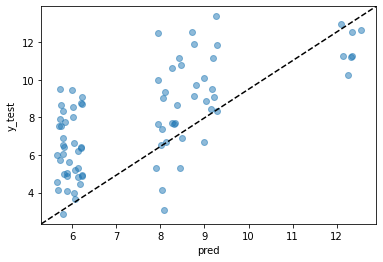

In [11]:
pred = regr_tree.predict(X_test)
plt.scatter(pred + np.random.uniform(-0.3,0.3,size=pred.shape), y_test, label = target_var, alpha=0.5)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

The test set MSE associated with the regression tree is $3.87$.

# Exercise c)

## Problem

![img/ex_c.png](img/ex_c.png)

## Solution

In [12]:
bagged = RandomForestRegressor(max_features = X_train.shape[1], random_state = 1)
bagged.fit(X_train, y_train)

RandomForestRegressor(max_features=14, random_state=1)

2.21028647025

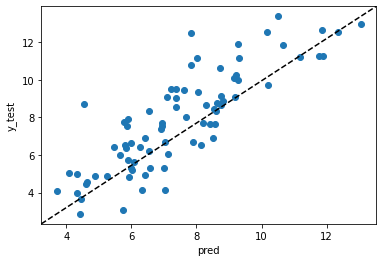

In [13]:
pred = bagged.predict(X_test)
plt.scatter(pred, y_test, label = target_var)
plt.plot([0, 1], [0, 1], '--k', transform = plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
mean_squared_error(y_test, pred)

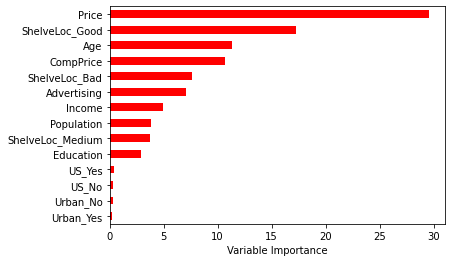

In [14]:
Importance = pd.DataFrame({'Importance': bagged.feature_importances_*100}, index = X.columns)
Importance.sort_values(by='Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The test set MSE associated with the bagged regression tree is significantly lower than our single tree. We can also note that price and a good shelve location are the most important predictors.

# Exercise d)

## Problem

![img/ex_d.png](img/ex_d.png)

## Solution

In [15]:
random_forest = RandomForestRegressor(max_features = 7, random_state = 1)
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)
mean_squared_error(y_test, pred)

2.0527978051249987

The test set MSE is even lower; this indicates that random forests yielded an improvement over bagging in this case.

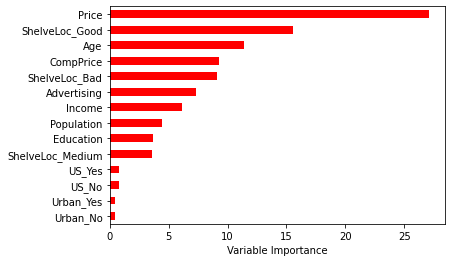

In [16]:
Importance = pd.DataFrame({'Importance': random_forest.feature_importances_*100}, index = X.columns)
Importance.sort_values(by='Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The results indicate that across all of the trees considered in the random forest, the Price and a good shelve location are by far the two most important variables.

In [17]:
def rforest(X_train, y_train, X_test, y_test, max_features):
    random_forest = RandomForestRegressor(max_features = max_features, random_state = 1)
    random_forest.fit(X_train, y_train)
    pred = random_forest.predict(X_test)
    return mean_squared_error(y_test, pred)

In [18]:
mse = np.array([rforest(X_train, y_train, X_test, y_test, max_features=m) for m in range(1, X.shape[1]+1)])

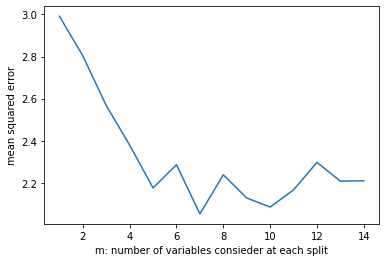

In [19]:
plt.plot(range(1, X.shape[1]+1), mse)
plt.ylabel('mean squared error')
plt.xlabel('m: number of variables consieder at each split')
plt.show()